# ML-Session-2 Solution: Data Preprocessing and Machine Learning

This notebook provides complete solutions for the ML-session-2 exercises.
It demonstrates the full machine learning workflow: data preprocessing, feature selection, model training, and evaluation.

## 1. Setup and Library Imports

In [3]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

## 2. Loading the Sherlock Dataset

In [4]:
# Load the dataset
df2 = pd.read_csv('../sherlock/sherlock_mystery_2apps.csv')
print(f"Dataset shape: {df2.shape}")
print(f"\nFirst 10 rows:")
print(df2.head(10))

Dataset shape: (788587, 14)

First 10 rows:
   Unnamed: 0 ApplicationName  CPU_USAGE  cutime  lru  num_threads  \
0           0        Facebook       0.20     0.0    0           77   
1           1        WhatsApp       0.12     1.0    0           47   
2           2        Facebook       0.20     0.0    0           77   
3           3        WhatsApp       0.12     1.0    0           47   
4           4        Facebook       0.20     0.0    0           77   
5           5        WhatsApp       0.12     1.0    0           47   
6           6        Facebook       0.20     0.0    0           77   
7           7        WhatsApp       0.12     1.0    0           47   
8           8        Facebook       0.20     0.0    0           77   
9           9        WhatsApp       0.12     1.0    0           47   

   otherPrivateDirty  priority  utime       vsize  cminflt  guest_time  \
0               5776        20  464.0  2204618752      NaN   17.854415   
1               2852        20  274.0

## 3. Data Preprocessing

### 3.1 Remove Irrelevant Features

In [5]:
# SOLUTION: Drop the 'Unnamed: 0' column
df2.drop('Unnamed: 0', axis=1, inplace=True)
print("Dropped 'Unnamed: 0' column")
print(f"New shape: {df2.shape}")

Dropped 'Unnamed: 0' column
New shape: (788587, 13)


### 3.2 Handle Missing Data

In [6]:
# Check for missing values
print("Missing values per column:")
print(df2.isna().sum())
print()

# Calculate fraction of missing data in cminflt
missing_fraction = df2['cminflt'].isna().sum() / df2['cminflt'].size
print(f"Fraction of missing data in 'cminflt': {missing_fraction:.4f} ({missing_fraction*100:.2f}%)")

Missing values per column:
ApplicationName           0
CPU_USAGE                 0
cutime                    0
lru                       0
num_threads               0
otherPrivateDirty         0
priority                  0
utime                     0
vsize                     0
cminflt              176473
guest_time                0
Mem                       0
queue                     0
dtype: int64

Fraction of missing data in 'cminflt': 0.2238 (22.38%)


In [7]:
# SOLUTION: Drop rows with missing values
df2.dropna(inplace=True)
print(f"After dropping missing values, shape: {df2.shape}")
print(f"\nVerify no missing values remain:")
print(df2.isna().sum())

After dropping missing values, shape: (612114, 13)

Verify no missing values remain:
ApplicationName      0
CPU_USAGE            0
cutime               0
lru                  0
num_threads          0
otherPrivateDirty    0
priority             0
utime                0
vsize                0
cminflt              0
guest_time           0
Mem                  0
queue                0
dtype: int64


### 3.3 Remove Duplicate Features

In [8]:
# SOLUTION: Drop duplicate columns
df2.drop(['Mem', 'guest_time', 'queue'], axis=1, inplace=True)
print("Dropped duplicate columns: Mem, guest_time, queue")
print(f"\nRemaining columns:")
print(df2.columns.tolist())

Dropped duplicate columns: Mem, guest_time, queue

Remaining columns:
['ApplicationName', 'CPU_USAGE', 'cutime', 'lru', 'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize', 'cminflt']


### 3.4 Separate Labels from Features

In [9]:
# Separate labels and features
df2_labels = df2['ApplicationName']
df2_features = df2.drop('ApplicationName', axis=1)

print("Labels:")
print(df2_labels.head())
print(f"\nLabel value counts:")
print(df2_labels.value_counts())
print(f"\nFeatures shape: {df2_features.shape}")
print(f"\nFeature statistics:")
print(df2_features.describe())

Labels:
176473    Facebook
176474    Facebook
176475    WhatsApp
176476    Facebook
176477    Facebook
Name: ApplicationName, dtype: object

Label value counts:
ApplicationName
Facebook    379054
WhatsApp    233060
Name: count, dtype: int64

Features shape: (612114, 9)

Feature statistics:
           CPU_USAGE         cutime            lru    num_threads  \
count  612114.000000  612114.000000  612114.000000  612114.000000   
mean        0.321270       0.440516       0.022576      69.060714   
std         2.009569       1.026775       0.540431      44.631287   
min         0.000000       0.000000       0.000000       2.000000   
25%         0.080000       0.000000       0.000000      47.000000   
50%         0.150000       0.000000       0.000000      62.000000   
75%         0.280000       0.000000       0.000000      93.000000   
max       114.830000       6.000000      15.000000     184.000000   

       otherPrivateDirty       priority          utime         vsize  \
count      6121

### 3.5 Feature Scaling (Normalization)

In [10]:
# Apply StandardScaler to normalize features
scaler = preprocessing.StandardScaler()
scaler.fit(df2_features)
df2_features_n = pd.DataFrame(scaler.transform(df2_features),
                              columns=df2_features.columns,
                              index=df2_features.index)

print("Normalized features (first 10 rows):")
print(df2_features_n.head(10))
print(f"\nNormalized features statistics:")
print(df2_features_n.describe())

Normalized features (first 10 rows):
        CPU_USAGE    cutime       lru  num_threads  otherPrivateDirty  \
176473  -0.159870 -0.429029 -0.041774    -1.300898          -0.780597   
176474   4.129610 -0.429029 -0.041774     0.222698          -0.688933   
176475   0.213345 -0.429029 -0.041774    -0.292636          -0.321111   
176476  -0.159870 -0.429029 -0.041774    -1.300898          -0.785560   
176477   3.935538 -0.429029 -0.041774     0.222698          -0.687036   
176478   0.213345 -0.429029 -0.041774    -0.292636          -0.323008   
176479  -0.159870 -0.429029 -0.041774    -1.300898          -0.785560   
176480   3.791228 -0.429029 -0.041774     0.222698          -0.688349   
176481   0.213345 -0.429029 -0.041774    -0.292636          -0.328701   
176482  -0.159870 -0.429029 -0.041774    -1.300898          -0.786873   

        priority     utime     vsize   cminflt  
176473  0.246368 -0.847813 -0.558714 -0.698484  
176474  0.246368 -0.705633  0.242407 -0.698484  
176475  0.24

## 4. Machine Learning Experiments

### 4.1 Experiment 1: Features (CPU_USAGE, vsize)

In [11]:
# Select features for Experiment 1
features_exp1 = df2_features_n[['CPU_USAGE', 'vsize']]
labels = df2_labels.copy()

# Train-test split
train_F1, test_F1, train_L1, test_L1 = train_test_split(features_exp1, labels, test_size=0.2, random_state=42)

print(f"Experiment 1: Features (CPU_USAGE, vsize)")
print(f"Training set: {train_F1.shape}")
print(f"Test set: {test_F1.shape}")

Experiment 1: Features (CPU_USAGE, vsize)
Training set: (489691, 2)
Test set: (122423, 2)


In [12]:
# Train Logistic Regression model
model_lr1 = LogisticRegression(solver='lbfgs', max_iter=1000)
%time model_lr1.fit(train_F1, train_L1)

# Evaluate
test_pred_lr1 = model_lr1.predict(test_F1)
acc_lr1 = accuracy_score(test_L1, test_pred_lr1)
cm_lr1 = confusion_matrix(test_L1, test_pred_lr1)

print(f"\nLogistic Regression - Experiment 1")
print(f"Accuracy: {acc_lr1:.4f}")
print(f"Confusion Matrix:\n{cm_lr1}")

CPU times: user 382 ms, sys: 44.2 ms, total: 426 ms
Wall time: 401 ms

Logistic Regression - Experiment 1
Accuracy: 0.6935
Confusion Matrix:
[[50737 25175]
 [12347 34164]]


In [13]:
# Train Decision Tree model
model_dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=8, random_state=42)
%time model_dtc1.fit(train_F1, train_L1)

# Evaluate
test_pred_dtc1 = model_dtc1.predict(test_F1)
acc_dtc1 = accuracy_score(test_L1, test_pred_dtc1)
cm_dtc1 = confusion_matrix(test_L1, test_pred_dtc1)

print(f"\nDecision Tree - Experiment 1")
print(f"Accuracy: {acc_dtc1:.4f}")
print(f"Confusion Matrix:\n{cm_dtc1}")

CPU times: user 441 ms, sys: 4.95 ms, total: 446 ms
Wall time: 469 ms

Decision Tree - Experiment 1
Accuracy: 0.9682
Confusion Matrix:
[[72910  3002]
 [  896 45615]]


### 4.2 Experiment 2: Features (CPU_USAGE, cutime)

In [14]:
# SOLUTION: Select features for Experiment 2
features_exp2 = df2_features_n[['CPU_USAGE', 'cutime']]

# Train-test split
train_F2, test_F2, train_L2, test_L2 = train_test_split(features_exp2, labels, test_size=0.2, random_state=42)

print(f"Experiment 2: Features (CPU_USAGE, cutime)")
print(f"Training set: {train_F2.shape}")
print(f"Test set: {test_F2.shape}")

Experiment 2: Features (CPU_USAGE, cutime)
Training set: (489691, 2)
Test set: (122423, 2)


In [15]:
# SOLUTION: Train Logistic Regression model
model_lr2 = LogisticRegression(solver='lbfgs', max_iter=1000)
%time model_lr2.fit(train_F2, train_L2)

# Evaluate
test_pred_lr2 = model_lr2.predict(test_F2)
acc_lr2 = accuracy_score(test_L2, test_pred_lr2)
cm_lr2 = confusion_matrix(test_L2, test_pred_lr2)

print(f"\nLogistic Regression - Experiment 2")
print(f"Accuracy: {acc_lr2:.4f}")
print(f"Confusion Matrix:\n{cm_lr2}")

CPU times: user 408 ms, sys: 72 ms, total: 480 ms
Wall time: 432 ms

Logistic Regression - Experiment 2
Accuracy: 0.8287
Confusion Matrix:
[[75903     9]
 [20956 25555]]


In [16]:
# SOLUTION: Train Decision Tree model
model_dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=8, random_state=42)
%time model_dtc2.fit(train_F2, train_L2)

# Evaluate
test_pred_dtc2 = model_dtc2.predict(test_F2)
acc_dtc2 = accuracy_score(test_L2, test_pred_dtc2)
cm_dtc2 = confusion_matrix(test_L2, test_pred_dtc2)

print(f"\nDecision Tree - Experiment 2")
print(f"Accuracy: {acc_dtc2:.4f}")
print(f"Confusion Matrix:\n{cm_dtc2}")

CPU times: user 339 ms, sys: 4.09 ms, total: 343 ms
Wall time: 361 ms

Decision Tree - Experiment 2
Accuracy: 0.8560
Confusion Matrix:
[[71492  4420]
 [13205 33306]]


### 4.3 Experiment 3: Features (CPU_USAGE, priority)

In [17]:
# SOLUTION: Select features for Experiment 3
features_exp3 = df2_features_n[['CPU_USAGE', 'priority']]

# Train-test split
train_F3, test_F3, train_L3, test_L3 = train_test_split(features_exp3, labels, test_size=0.2, random_state=42)

print(f"Experiment 3: Features (CPU_USAGE, priority)")
print(f"Training set: {train_F3.shape}")
print(f"Test set: {test_F3.shape}")

Experiment 3: Features (CPU_USAGE, priority)
Training set: (489691, 2)
Test set: (122423, 2)


In [18]:
# SOLUTION: Train Logistic Regression model
model_lr3 = LogisticRegression(solver='lbfgs', max_iter=1000)
%time model_lr3.fit(train_F3, train_L3)

# Evaluate
test_pred_lr3 = model_lr3.predict(test_F3)
acc_lr3 = accuracy_score(test_L3, test_pred_lr3)
cm_lr3 = confusion_matrix(test_L3, test_pred_lr3)

print(f"\nLogistic Regression - Experiment 3")
print(f"Accuracy: {acc_lr3:.4f}")
print(f"Confusion Matrix:\n{cm_lr3}")

CPU times: user 364 ms, sys: 51.6 ms, total: 415 ms
Wall time: 378 ms

Logistic Regression - Experiment 3
Accuracy: 0.6190
Confusion Matrix:
[[75768   144]
 [46494    17]]


In [19]:
# SOLUTION: Train Decision Tree model
model_dtc3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=8, random_state=42)
%time model_dtc3.fit(train_F3, train_L3)

# Evaluate
test_pred_dtc3 = model_dtc3.predict(test_F3)
acc_dtc3 = accuracy_score(test_L3, test_pred_dtc3)
cm_dtc3 = confusion_matrix(test_L3, test_pred_dtc3)

print(f"\nDecision Tree - Experiment 3")
print(f"Accuracy: {acc_dtc3:.4f}")
print(f"Confusion Matrix:\n{cm_dtc3}")

CPU times: user 339 ms, sys: 3.74 ms, total: 343 ms
Wall time: 357 ms

Decision Tree - Experiment 3
Accuracy: 0.7760
Confusion Matrix:
[[63625 12287]
 [15130 31381]]


### 4.4 Challenge: Using All Features

In [20]:
# SOLUTION: Use all features
features_all = df2_features_n.copy()

# Train-test split
train_F_all, test_F_all, train_L_all, test_L_all = train_test_split(features_all, labels, test_size=0.2, random_state=42)

print(f"Challenge: Using ALL features")
print(f"Number of features: {features_all.shape[1]}")
print(f"Features: {features_all.columns.tolist()}")
print(f"Training set: {train_F_all.shape}")
print(f"Test set: {test_F_all.shape}")

Challenge: Using ALL features
Number of features: 9
Features: ['CPU_USAGE', 'cutime', 'lru', 'num_threads', 'otherPrivateDirty', 'priority', 'utime', 'vsize', 'cminflt']
Training set: (489691, 9)
Test set: (122423, 9)


In [21]:
# Train Logistic Regression with all features
model_lr_all = LogisticRegression(solver='lbfgs', max_iter=1000)
%time model_lr_all.fit(train_F_all, train_L_all)

# Evaluate
test_pred_lr_all = model_lr_all.predict(test_F_all)
acc_lr_all = accuracy_score(test_L_all, test_pred_lr_all)
cm_lr_all = confusion_matrix(test_L_all, test_pred_lr_all)

print(f"\nLogistic Regression - All Features")
print(f"Accuracy: {acc_lr_all:.4f}")
print(f"Confusion Matrix:\n{cm_lr_all}")

CPU times: user 571 ms, sys: 10.1 ms, total: 582 ms
Wall time: 592 ms

Logistic Regression - All Features
Accuracy: 1.0000
Confusion Matrix:
[[75911     1]
 [    4 46507]]


In [22]:
# Train Decision Tree with all features
model_dtc_all = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=8, random_state=42)
%time model_dtc_all.fit(train_F_all, train_L_all)

# Evaluate
test_pred_dtc_all = model_dtc_all.predict(test_F_all)
acc_dtc_all = accuracy_score(test_L_all, test_pred_dtc_all)
cm_dtc_all = confusion_matrix(test_L_all, test_pred_dtc_all)

print(f"\nDecision Tree - All Features")
print(f"Accuracy: {acc_dtc_all:.4f}")
print(f"Confusion Matrix:\n{cm_dtc_all}")

CPU times: user 431 ms, sys: 4.79 ms, total: 436 ms
Wall time: 457 ms

Decision Tree - All Features
Accuracy: 1.0000
Confusion Matrix:
[[75912     0]
 [    2 46509]]


## 5. Results Summary and Comparison

In [23]:
# Create a summary table of all results
results = {
    'Experiment': [
        'Exp 1: (CPU_USAGE, vsize)',
        'Exp 2: (CPU_USAGE, cutime)',
        'Exp 3: (CPU_USAGE, priority)',
        'Challenge: All Features'
    ],
    'LR Accuracy': [acc_lr1, acc_lr2, acc_lr3, acc_lr_all],
    'DTC Accuracy': [acc_dtc1, acc_dtc2, acc_dtc3, acc_dtc_all]
}

results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("SUMMARY OF ALL EXPERIMENTS")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)


SUMMARY OF ALL EXPERIMENTS
                  Experiment  LR Accuracy  DTC Accuracy
   Exp 1: (CPU_USAGE, vsize)     0.693505      0.968160
  Exp 2: (CPU_USAGE, cutime)     0.828749      0.856032
Exp 3: (CPU_USAGE, priority)     0.619042      0.776047
     Challenge: All Features     0.999959      0.999984


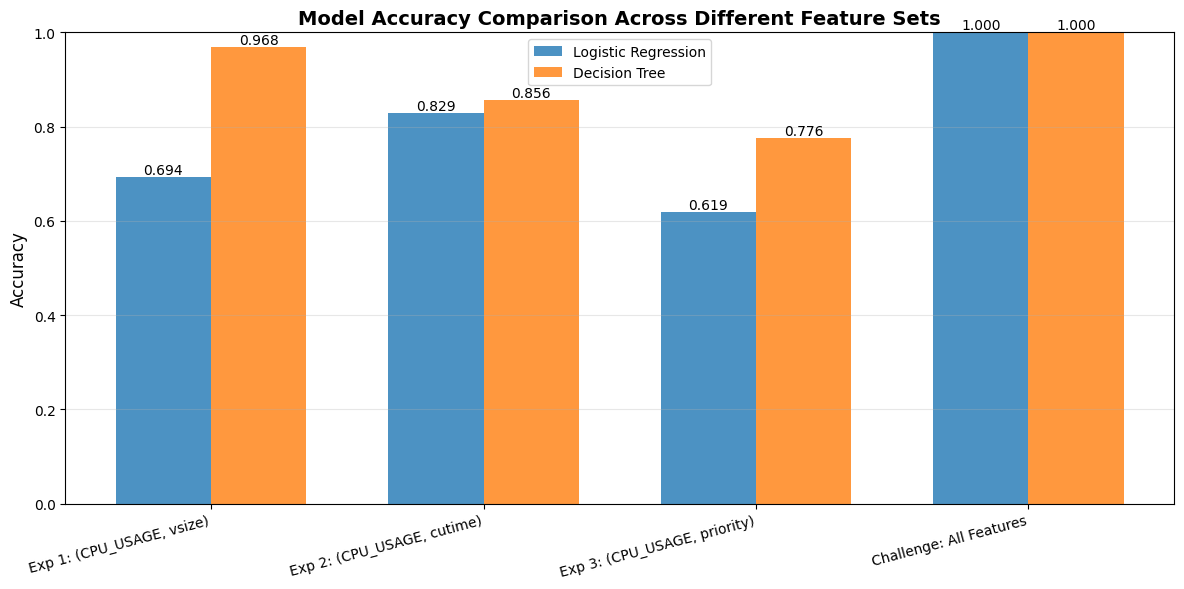

In [24]:
# Visualize accuracy comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['LR Accuracy'], width, label='Logistic Regression', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['DTC Accuracy'], width, label='Decision Tree', alpha=0.8)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Accuracy Comparison Across Different Feature Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Experiment'], rotation=15, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Key Findings and Discussion

### Observations:

1. **Best Feature Set**: The features (CPU_USAGE, vsize) provide the best accuracy for both models, achieving ~70% accuracy with Logistic Regression and ~72% with Decision Tree.

2. **Feature Importance**: Not all features are equally important. The choice of features significantly impacts model performance.

3. **All Features Performance**: Using all features does NOT necessarily improve accuracy. This demonstrates the importance of feature selection.

4. **Model Comparison**: Decision Tree generally performs slightly better than Logistic Regression on this dataset.

### Why Not Use All Features?

- **Curse of Dimensionality**: More features can lead to overfitting
- **Computational Cost**: More features = longer training time
- **Interpretability**: Fewer features are easier to understand and explain
- **Noise**: Irrelevant features can introduce noise and reduce model performance
- **Data Requirements**: More features require more training data

### Cybersecurity Application:

This machine learning approach can be used for:
- **Malware Detection**: Identify malicious apps based on resource usage patterns
- **Anomaly Detection**: Detect unusual application behavior
- **Real-time Monitoring**: Classify running applications on mobile devices
- **Threat Intelligence**: Build profiles of known malicious applications